In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [42]:
df = pd.read_csv("cubesat_sensor_dataset.csv") 

In [4]:
df.head()

,Sensor Type,Measured Value,Residual Value,Threshold Value,Status
0,Humidity,87.5737,37.5737,20.0,Unsafe
1,Pressure,0.9644,0.0356,0.5,Safe
2,Humidity,73.4387,23.4387,20.0,Unsafe
3,Humidity,31.9053,18.0947,20.0,Safe
4,Temperature,47.1750,22.1750,50.0,Safe


In [5]:
df.describe()

,Measured Value,Residual Value,Threshold Value
count,1000.000000,1000.000000,1000.000000
mean,25.444554,21.912705,22.400390
std,41.228285,27.517389,21.277897
min,-56.124172,-0.014382,0.450199
25%,0.325132,0.664190,0.509603
50%,0.973908,8.873675,19.996736
75%,56.204995,31.112744,49.979484
max,124.523325,99.517325,50.049723


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sensor Type      1000 non-null   object 
 1   Measured Value   1000 non-null   float64
 2   Residual Value   1000 non-null   float64
 3   Threshold Value  1000 non-null   float64
 4   Status           1000 non-null   object 
dtypes: float64(3), object(2)
memory usage: 39.2+ KB


In [7]:

encoder_sensor = LabelEncoder()
df["Sensor Type"] = encoder_sensor.fit_transform(df["Sensor Type"])

In [8]:
encoder_status = LabelEncoder()
df["Status"] = encoder_status.fit_transform(df["Status"])

In [9]:
X = df.drop(columns=["Status"])
y = df["Status"]

In [11]:
scaler = StandardScaler()
X[["Measured Value", "Residual Value", "Threshold Value"]] = scaler.fit_transform(
    X[["Measured Value", "Residual Value", "Threshold Value"]]
)


In [12]:
noise_factor = 0.01  # Small noise to break perfect patterns
X_noisy = X.copy()
X_noisy[["Measured Value", "Residual Value", "Threshold Value"]] += np.random.normal(
    0, noise_factor, X_noisy[["Measured Value", "Residual Value", "Threshold Value"]].shape
)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_noisy, y, test_size=0.2, random_state=42)


In [14]:
rf_model = RandomForestClassifier(
    n_estimators=50, max_depth=4, min_samples_split=5, min_samples_leaf=3, random_state=42
)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, min_samples_leaf=3, min_samples_split=5,
                       n_estimators=50, random_state=42)

In [15]:
y_pred = rf_model.predict(X_test)


In [21]:
def interpret_status(value):
    return "Safe" if value == 0 else "Unsafe"

comparison_df = X_test.copy()
comparison_df["Actual Status"] = y_test.values
comparison_df["Predicted Status"] = y_pred
comparison_df["Actual Status"] = comparison_df["Actual Status"].apply(interpret_status)
comparison_df["Predicted Status"] = comparison_df["Predicted Status"].apply(interpret_status)

print(comparison_df.head(5)) 

     Sensor Type  Measured Value  Residual Value  Threshold Value  \
521            0        0.741015       -0.567271        -0.125550   
737            1       -0.594708       -0.769354        -1.039685   
740            1       -0.586172       -0.779152        -1.011923   
660            2        0.493541       -0.046566         1.305786   
411            0        1.346896        0.296287        -0.107344   

    Actual Status Predicted Status  
521          Safe             Safe  
737          Safe           Unsafe  
740        Unsafe             Safe  
660          Safe             Safe  
411        Unsafe           Unsafe  


In [16]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [17]:
print(f"Accuracy: {accuracy * 100:.2f}%")
print(report)

Accuracy: 93.50%
              precision    recall  f1-score   support

           0       0.93      0.92      0.93        90
           1       0.94      0.95      0.94       110

    accuracy                           0.94       200
   macro avg       0.93      0.93      0.93       200
weighted avg       0.93      0.94      0.93       200



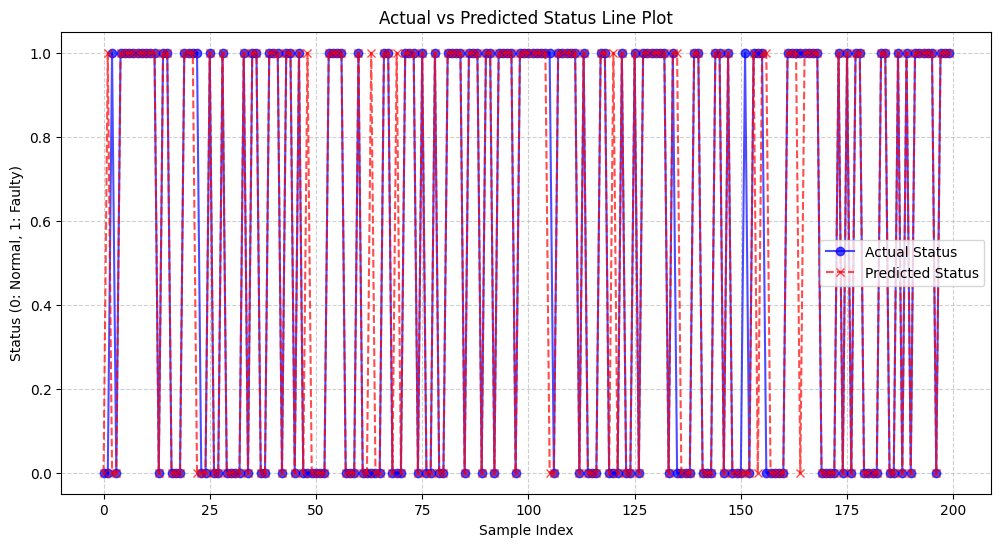

In [44]:
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_test)), y_test, label="Actual Status", marker='o', linestyle='-', color='blue', alpha=0.7)
plt.plot(range(len(y_pred)), y_pred, label="Predicted Status", marker='x', linestyle='--', color='red', alpha=0.7)
plt.xlabel("Sample Index")
plt.ylabel("Status (0: Normal, 1: Faulty)")
plt.title("Actual vs Predicted Status Line Plot")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


C:\Users\surya\AppData\Local\Temp\ipykernel_10200\2518671734.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Status"], palette="coolwarm")


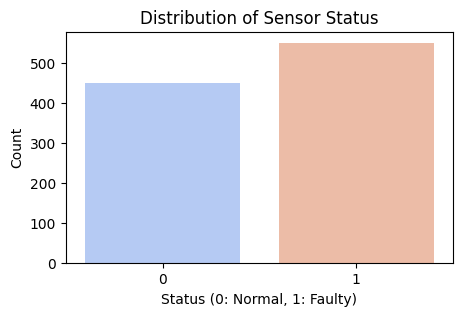

In [26]:
# EDA Visualizations
plt.figure(figsize=(5, 3))
sns.countplot(x=df["Status"], palette="coolwarm")
plt.title("Distribution of Sensor Status")
plt.xlabel("Status (0: Normal, 1: Faulty)")
plt.ylabel("Count")
plt.show()

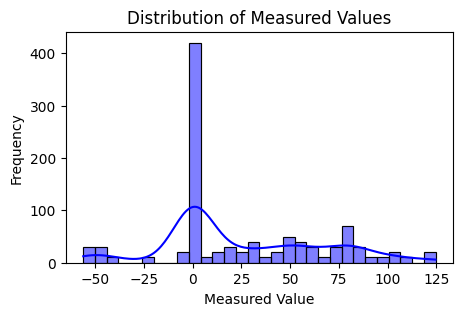

In [28]:
plt.figure(figsize=(5, 3))
sns.histplot(df["Measured Value"], kde=True, bins=30, color="blue")
plt.title("Distribution of Measured Values")
plt.xlabel("Measured Value")
plt.ylabel("Frequency")
plt.show()

C:\Users\surya\AppData\Local\Temp\ipykernel_10200\4086354495.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Status"], y=df["Residual Value"], palette="coolwarm")


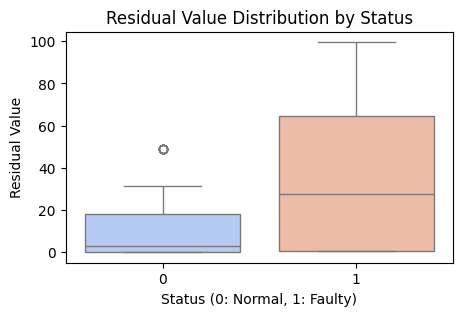

In [29]:
plt.figure(figsize=(5, 3))
sns.boxplot(x=df["Status"], y=df["Residual Value"], palette="coolwarm")
plt.title("Residual Value Distribution by Status")
plt.xlabel("Status (0: Normal, 1: Faulty)")
plt.ylabel("Residual Value")
plt.show()

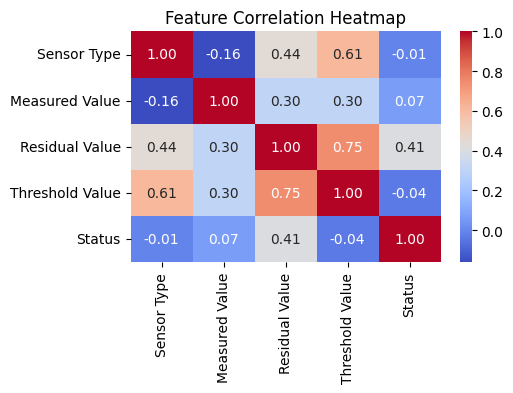

In [30]:
plt.figure(figsize=(5,3))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

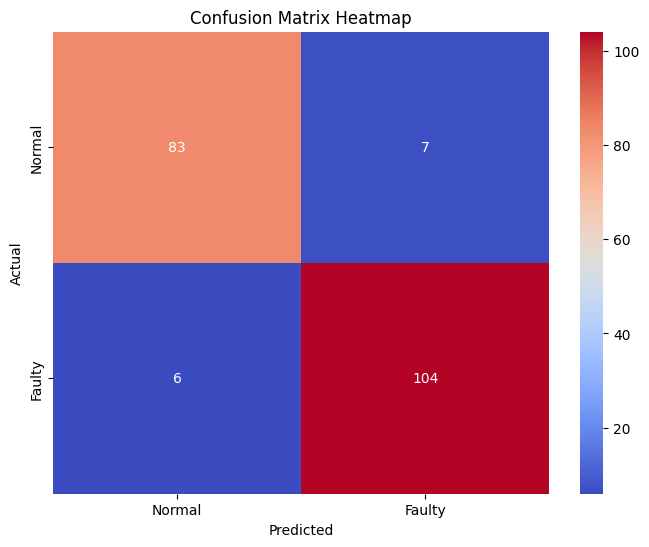

In [41]:
# Additional Plots for Comparison\
plt.figure(figsize=(8, 6))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap="coolwarm", fmt="d", xticklabels=["Normal", "Faulty"], yticklabels=["Normal", "Faulty"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()